In [4]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import os

In [130]:
train_path = '/home/yusuf/Desktop/projects/data/fastmri/multicoil_train/'
val_path = '/home/yusuf/Desktop/projects/data/fastmri/multicoil_val/'
test_path = '/home/yusuf/Desktop/projects/data/fastmri/multicoil_test/'
train_list = [f for f in os.listdir(train_path) if f.endswith('.h5')]
val_list = [f for f in os.listdir(val_path) if f.endswith('.h5')] 
test_list = [f for f in os.listdir(test_path) if f.endswith('.h5')]


"""
tshapelist = []
for file in train_list:
    file_path = os.path.join(train_path, file)
    with h5py.File(file_path, 'r') as hf:
        volume_kspace_shape = hf['kspace'].shape
        tshapelist.append(volume_kspace_shape)
"""

"\ntshapelist = []\nfor file in train_list:\n    file_path = os.path.join(train_path, file)\n    with h5py.File(file_path, 'r') as hf:\n        volume_kspace_shape = hf['kspace'].shape\n        tshapelist.append(volume_kspace_shape)\n"

In [131]:
file_names = []
num_slices = []
num_coils = []
heights = []
widths = []

# Loop over each file and retrieve shape details
for file in test_list:
    file_path = os.path.join(test_path, file)
    with h5py.File(file_path, 'r') as hf:
        # Get shape of the k-space data
        volume_kspace_shape = hf['kspace'].shape
        slices, coils, height, width = volume_kspace_shape
        
        # Append data to respective lists
        file_names.append(file)
        num_slices.append(slices)
        num_coils.append(coils)
        heights.append(height)
        widths.append(width)

# Create a DataFrame from the collected data
df = pd.DataFrame({
    'file_name': file_names,
    'num_slices': num_slices,
    'num_coils': num_coils,
    'height': heights,
    'width': widths
})

In [132]:
df

,file_name,num_slices,num_coils,height,width
0,file_brain_AXFLAIR_210_6001880.h5,16,20,640,320
1,file_brain_AXT2_208_2080123.h5,16,4,640,320
2,file_brain_AXT1PRE_201_6002726.h5,16,16,640,320
3,file_brain_AXT2_202_2020375.h5,14,20,640,320
4,file_brain_AXT2_201_2010395.h5,16,16,768,396
...,...,...,...,...,...
181,file_brain_AXFLAIR_200_6002635.h5,16,16,640,320
182,file_brain_AXT1POST_208_2080056.h5,16,6,640,322
183,file_brain_AXT2_200_6002031.h5,16,16,768,396
184,file_brain_AXT1_206_2120004.h5,16,20,640,320


In [227]:
mrtypelis=[]
for i in df.file_name:
    mrtype = i.split("_")[2]
    mrtypelis.append(mrtype)



In [228]:
len(mrtypelis)

186

In [229]:
df["mr_type"]=mrtypelis

In [230]:
df.mr_type.value_counts()

AXT2        106
AXT1POST     39
AXFLAIR      17
AXT1PRE      14
AXT1         10
Name: mr_type, dtype: int64

In [133]:
df["num_slices"].sum()

2956

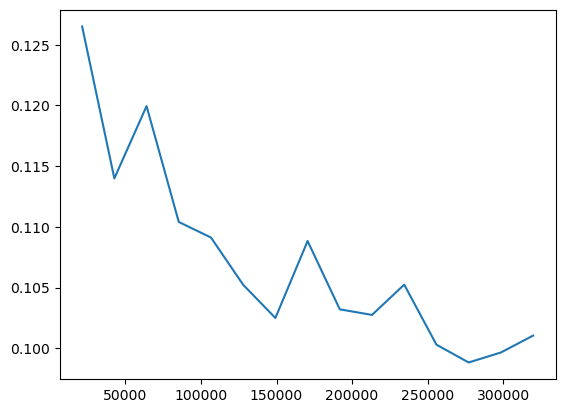

In [51]:
import pandas as pd

df = pd.read_csv("/home/yusuf/Downloads/csv.csv")
plt.plot(df["Step"],df["Value"])
plt.show()

In [ ]:
# test datasını görselleştir kontrol et

In [215]:
#path = "/home/yusuf/Desktop/projects/repos/fastMRI/fastmri_examples/unet/inference/reconstructions"
# path = "/home/yusuf/Desktop/projects/data/multicoil_test_full"
path = "/home/yusuf/Desktop/projects/repos/fastMRI/fastmri_examples/varnet/varnet/varnet_demo/reconstructions"
data = os.listdir(path)
file_name = f'{path}/{data[0]}'
hf = h5py.File(file_name)

In [216]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['reconstruction']
Attrs: {}


In [217]:
slice_index=1
volume_kspace = hf['reconstruction'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)
slice_kspace = volume_kspace[slice_index]

float32
(16, 320, 320)


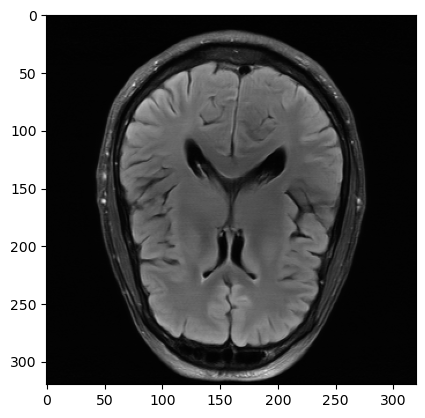

In [200]:
plt.imshow(slice_kspace[0],cmap='gray')

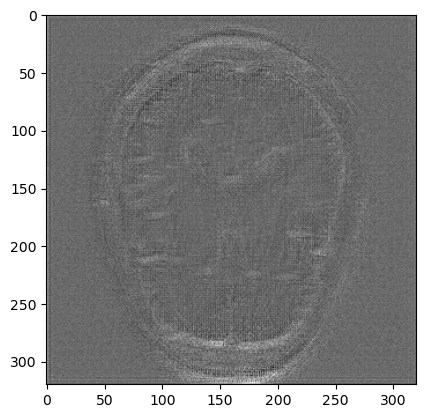

In [180]:
plt.imshow(slice_kspace,cmap='gray')

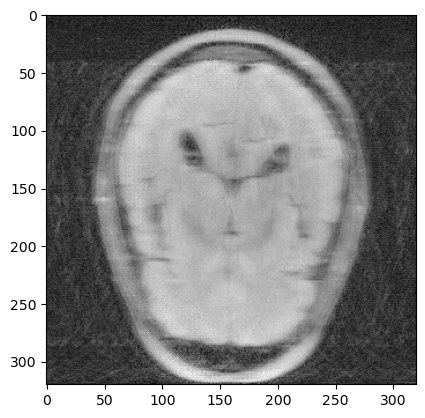

In [167]:
plt.imshow(np.log(np.abs(volume_kspace[0])),cmap='gray')

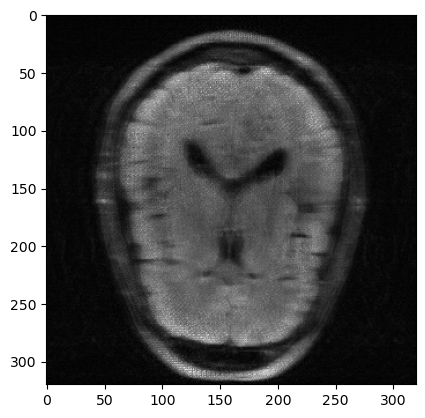

In [218]:
plt.imshow(slice_kspace,cmap='gray')

In [104]:
def normalize_image(image):
    # Normalize the image to range [0, 1]
    image_min = image.min()
    image_max = image.max()
    normalized_image = (image - image_min) / (image_max - image_min)
    return normalized_image

normalize_image(slice_kspace)

array([[0.55339974, 0.52001715, 0.56101793, ..., 0.52474385, 0.55842125,
        0.5982309 ],
       [0.5270646 , 0.53888637, 0.5759471 , ..., 0.5389571 , 0.5140142 ,
        0.564052  ],
       [0.56410766, 0.53962827, 0.5990722 , ..., 0.51715523, 0.5732986 ,
        0.57200783],
       ...,
       [0.52346534, 0.57128346, 0.56793207, ..., 0.532833  , 0.54832804,
        0.61472046],
       [0.5615893 , 0.55613863, 0.583545  , ..., 0.5418166 , 0.57418555,
        0.5897806 ],
       [0.5623835 , 0.5419434 , 0.56880474, ..., 0.5571296 , 0.5534957 ,
        0.5943874 ]], dtype=float32)

In [97]:
import fastmri
from fastmri.data import transforms as T

slice_kspace2 = T.to_tensor(slice_kspace)      # Convert from numpy array to pytorch tensor
slice_image = fastmri.ifft2c(slice_kspace2)           # Apply Inverse Fourier Transform to get the complex image
slice_image_abs = fastmri.complex_abs(slice_image) 

ValueError: Tensor does not have separate complex dim.

In [77]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)

complex64
(16, 16, 768, 396)


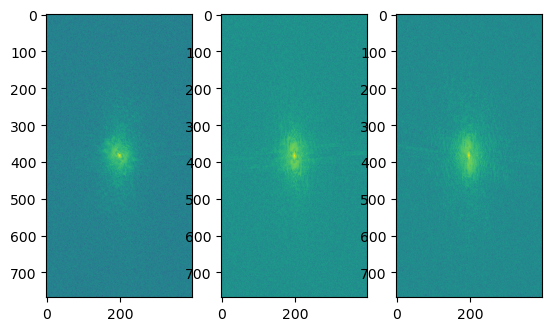

In [80]:
slice_kspace = volume_kspace[6] # Choosing the *16-th slice of this volume
def show_coils(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)

show_coils(np.log(np.abs(slice_kspace) + 1e-9), [0, 1, 2])  # This shows coils 0, *1 and *2

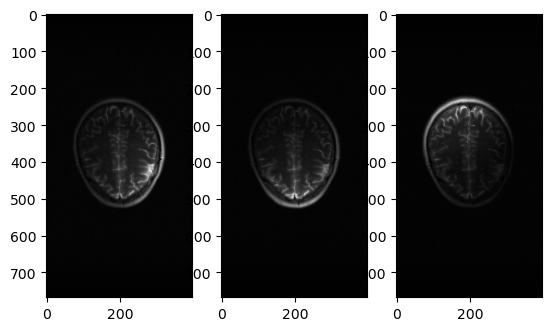

In [81]:
slice_kspace2 = T.to_tensor(slice_kspace)      # Convert from numpy array to pytorch tensor
slice_image = fastmri.ifft2c(slice_kspace2)           # Apply Inverse Fourier Transform to get the complex image
slice_image_abs = fastmri.complex_abs(slice_image)   # Compute absolute value to get a real image

show_coils(slice_image_abs, [0, 1, 2], cmap='gray')

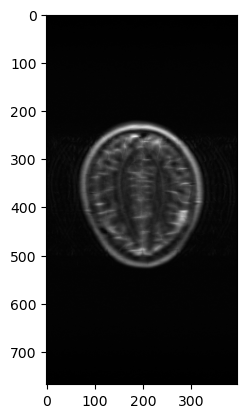

In [59]:
slice_image_rss = fastmri.rss(slice_image_abs, dim=0)
plt.imshow(np.abs(slice_image_rss.numpy()), cmap='gray')

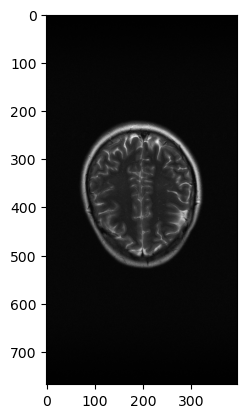

In [82]:
slice_image_rss = fastmri.rss(slice_image_abs, dim=0)
plt.imshow(np.abs(slice_image_rss.numpy()), cmap='gray')

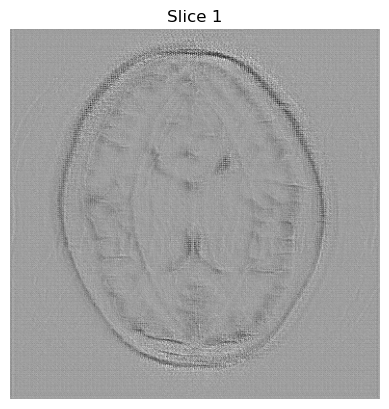

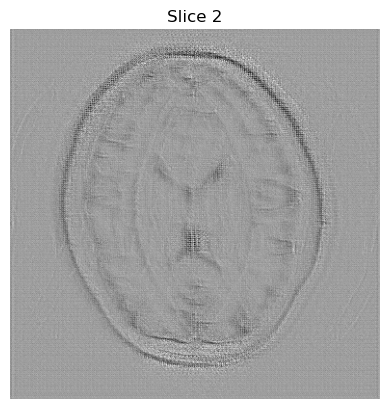

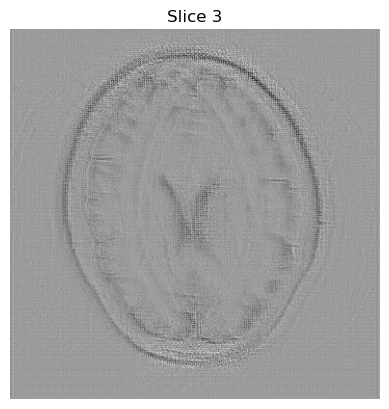

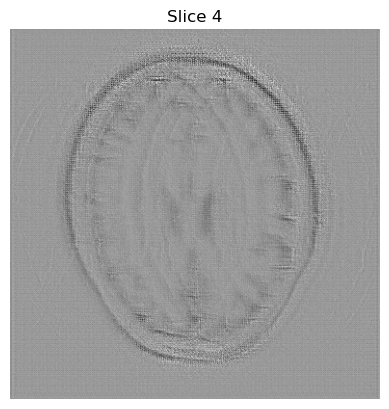

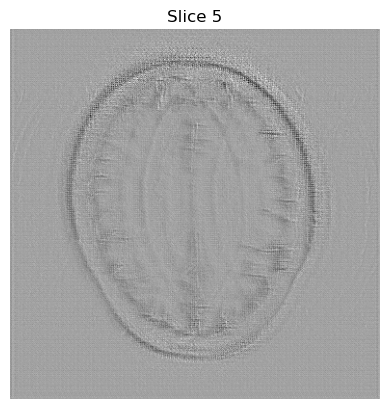

In [85]:
num_slices = volume_kspace.shape[0]
for i in range(min(5, num_slices)):  # Visualize up to 5 slices
    img = volume_kspace[i]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Slice {i+1}")
    plt.show()

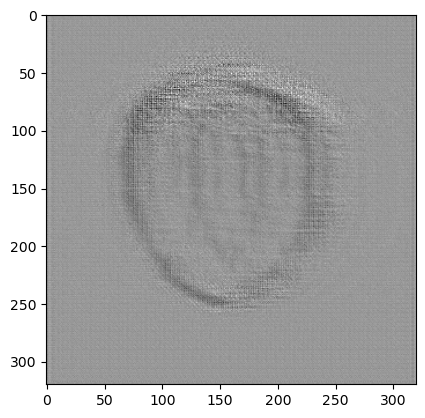

In [28]:
plt.imshow(slice_kspace,cmap='gray')

In [15]:
def show_coils(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)

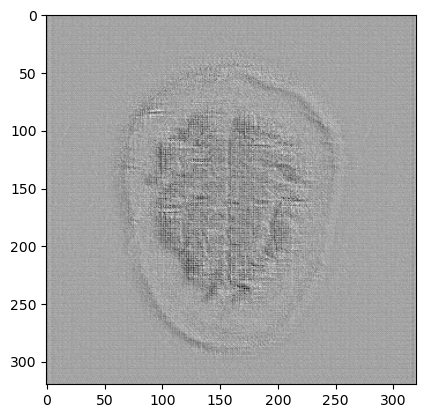

In [24]:
def preprocess_image(image):
    if np.iscomplexobj(image):  # Convert complex to real if necessary
        image = np.abs(image)
    # Normalize to 0-1
    image -= image.min()
    image /= image.max()
    return image
plt.imshow(preprocess_image(slice_kspace),cmap='gray')

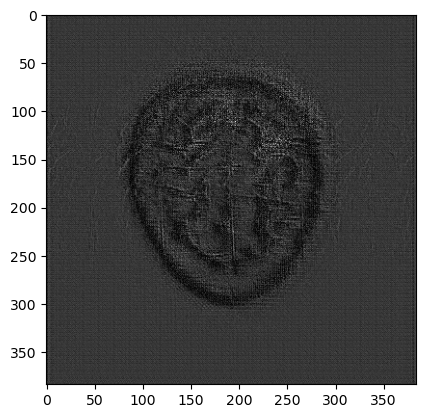

In [36]:
plt.imshow(np.abs(slice_kspace),cmap='gray')

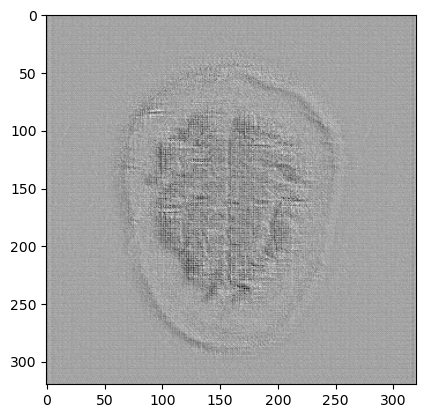

In [14]:
plt.imshow(slice_kspace,cmap='gray')

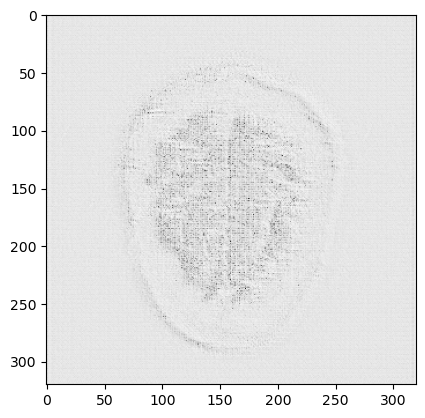

In [ ]:
plt.imshow(np.log(np.abs(slice_kspace) + 1e-9), cmap='gray')  # This shows coils 0, *1 and *2